In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv('observations.csv')
df1.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
df2 = pd.read_csv('species_info.csv')
df2.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
df = pd.merge(df1,df2) #merging two dataframes into one
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [5]:
obs_sum = df.groupby(df['park_name']).sum().reset_index()
obs_sum.head()

,park_name,observations
0,Bryce National Park,633291
1,Great Smoky Mountains National Park,474863
2,Yellowstone National Park,1587641
3,Yosemite National Park,949452


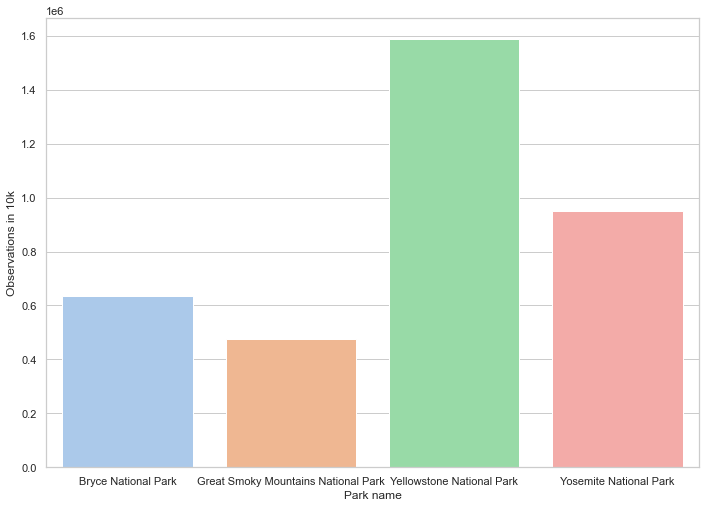

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = plt.subplot()
sns.barplot(data = obs_sum, x='park_name', y='observations', palette = 'pastel')
plt.xlabel('Park name')
plt.ylabel('Observations in 10k')
plt.show()

In [7]:
obs_mean = df.groupby(df['park_name']).mean().reset_index()
obs_mean

,park_name,observations
0,Bryce National Park,98.828184
1,Great Smoky Mountains National Park,74.104713
2,Yellowstone National Park,247.759207
3,Yosemite National Park,148.166667


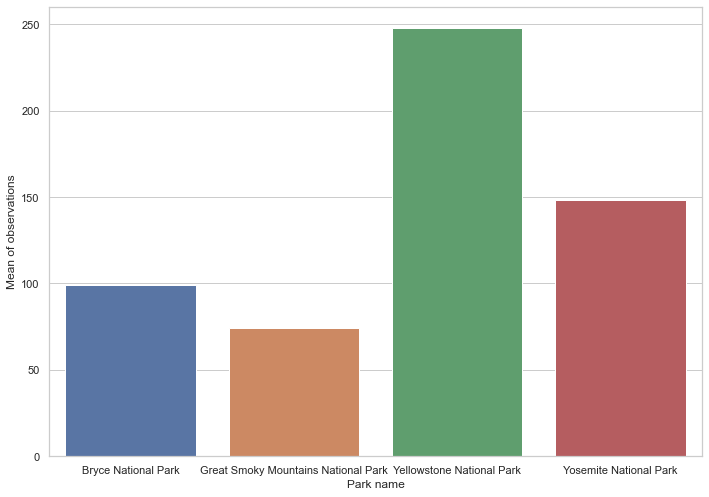

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = plt.subplot()
sns.barplot(data = obs_mean, x='park_name', y='observations', palette = 'deep')
plt.xlabel('Park name')
plt.ylabel('Mean of observations')
plt.show()

In [9]:
x = df['category'].value_counts().reset_index()
x

,index,category
0,Vascular Plant,19560
1,Bird,2364
2,Nonvascular Plant,1332
3,Mammal,1200
4,Fish,524
5,Amphibian,328
6,Reptile,324


In [10]:
by_category = df.groupby(df['category']).sum().reset_index()
by_category

,category,observations
0,Amphibian,45068
1,Bird,332371
2,Fish,72901
3,Mammal,163120
4,Nonvascular Plant,190653
5,Reptile,45822
6,Vascular Plant,2795312


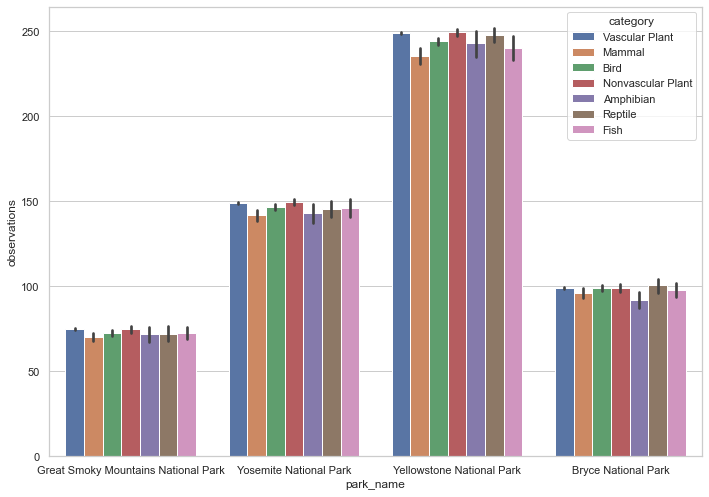

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = plt.subplot()
sns.barplot(data = df, x='park_name', y='observations', hue ='category' ,palette = 'deep')
plt.show()

In [12]:
df_animals = df[(df['category']=='Mammal') |(df['category']=='Bird') | 
                (df['category']=='Amphibian') | (df['category']=='Reptile') | 
                (df['category']=='Fish') ] #creating df containing only data about animals
df_animals.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,NaN
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,NaN
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,NaN
24,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,NaN


In [13]:
df_plants = df[(df['category']=='Vascular Plant') | 
               (df['category']=='Nonvascular PLant')] #creating df containg only data about plants
df_plants.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN


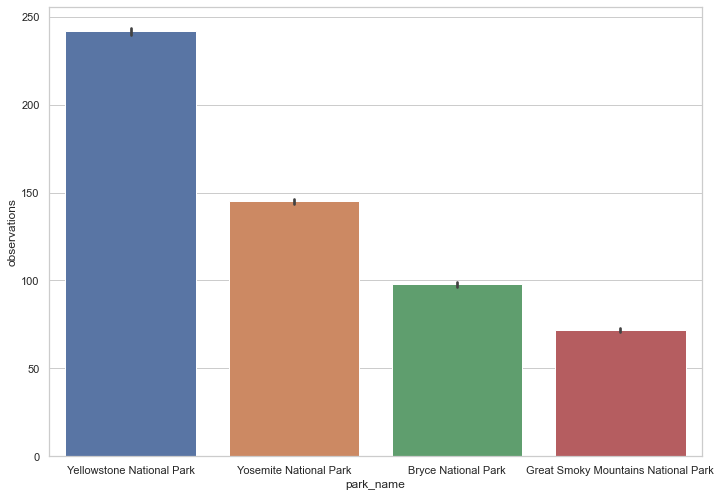

In [23]:
sns.barplot(data = df_animals, x='park_name', y='observations', palette = 'deep', 
            order = ['Yellowstone National Park','Yosemite National Park', 'Bryce National Park', 'Great Smoky Mountains National Park'])
plt.show()

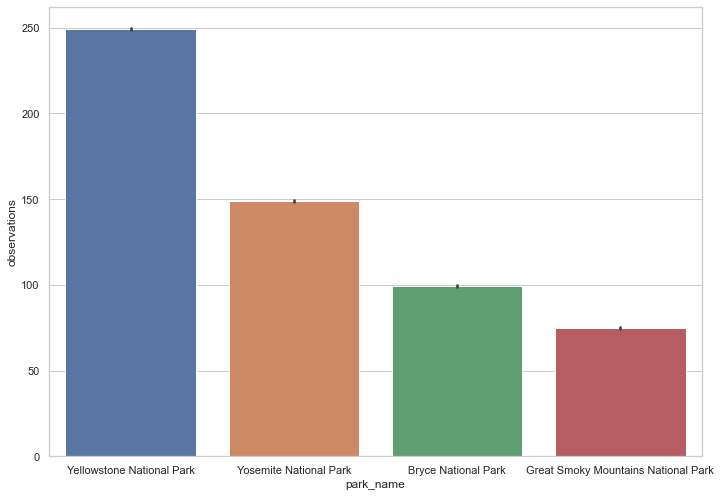

In [22]:
sns.barplot(data = df_plants, x='park_name', y='observations', palette = 'deep', 
            order = ['Yellowstone National Park','Yosemite National Park', 'Bryce National Park', 'Great Smoky Mountains National Park'])
plt.show()
plt.show()